# ACME-HappinessSurvey2020


## Problem Statement

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

### Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

### Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach, show us what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

## Data Description:

Y  = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

### This is a binary classificaton problem to predict wheather a customer would be happy or not based on feedbacks on services received.
In this project a Classification Model will be used to categorize the target attribute

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import joblib

# Import the Models and Methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, chi2

from sklearn.metrics import (f1_score, accuracy_score, 
                             recall_score, 
                             precision_score, 
                             confusion_matrix, 
                             roc_auc_score, 
                             plot_confusion_matrix, 
                             classification_report, 
                             precision_recall_curve)

# Settings
from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

#### Get the data, explore it and process it for prediction Models

In [2]:
# Read in Dataset

Dataset = pd.read_csv('..\Public\\ACME-HappinessSurvey2020.csv')

print(Dataset.shape)
Dataset.head(5)

(126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
Dataset.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:ylabel='Y'>

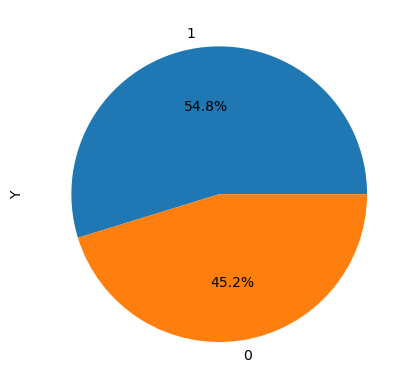

In [5]:
Dataset['Y'].value_counts().plot.pie(autopct='%1.1f%%')

### Observations:
* There are no missing values in the data

* X2 "contents of my order was as I expected", has the lowest mean (average rating)
* X2 "contents of my order was as I expected", X3 "I ordered everything I wanted to order" and X5 "I am satisfied with my courier"

* 54.8% of the customers are happy with the service

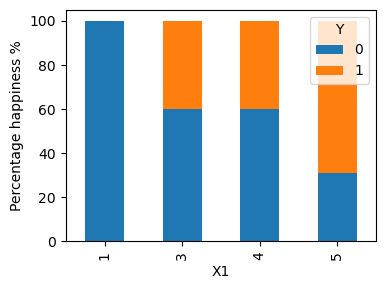

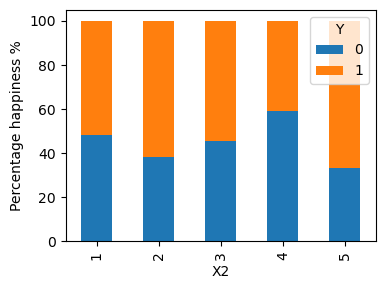

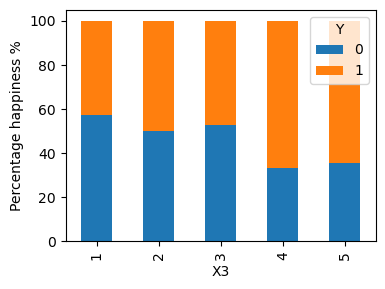

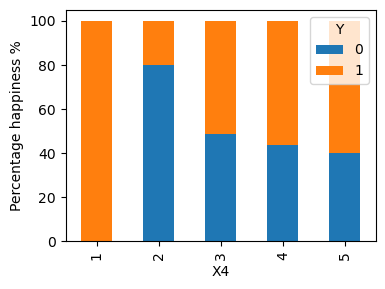

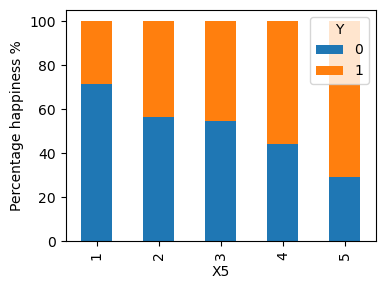

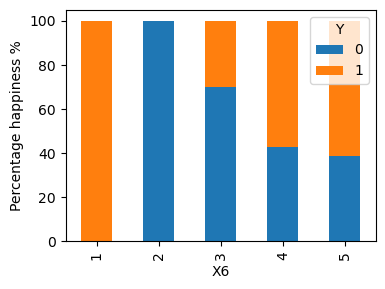

In [6]:
X_variables = ["X1", "X2", "X3","X4", "X5", "X6"]

for i in X_variables:
    (pd.crosstab(Dataset[i],Dataset['Y'],normalize='index')*100).plot(kind='bar',figsize=(4,3),stacked=True)
    plt.ylabel('Percentage happiness %')

In [7]:
# Correlation (For selecting the most correlated feature to the target)

Dataset.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


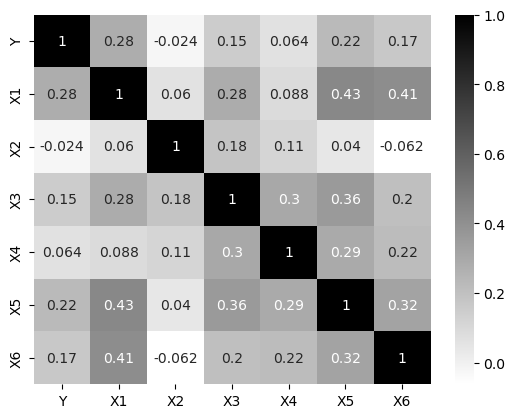

In [8]:
cor = Dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.binary)
plt.show()

In [9]:
# Check how correlated each feature is to the target 

print(cor['Y'].sort_values(ascending=False))

Y     1.000000
X1    0.280160
X5    0.224522
X6    0.167669
X3    0.150838
X4    0.064415
X2   -0.024274
Name: Y, dtype: float64


## Observations from exploring the dataset

* It shows that the ratings from customers for 'contents of my order was as I expected' (X2) and  'I paid a good price for my order' (X4) are the least correlated features to determine wheather the customers are happy or not. While 'my order was delivered on time' (X1) and ' I am satisfied with my courier' (X5) had the strongest correlation to the target attribute 'Y'

* From the barplots it shows that 'I ordered everything I wanted to order' (X3) and 'the app makes ordering easy for me' (X6) didn't have direct impact on the happiness of the customers.

* Also, the heatmap shows the X1, X5 and X6 are strongly correlated to each other.

In [10]:
# Define Features and Targets

Y = Dataset ['Y']
X = Dataset.drop('Y', axis=1)

print (X)
print (Y)

     X1  X2  X3  X4  X5  X6
0     3   3   3   4   2   4
1     3   2   3   5   4   3
2     5   3   3   3   3   5
3     5   4   3   3   3   5
4     5   4   3   3   3   5
..   ..  ..  ..  ..  ..  ..
121   5   2   3   4   4   3
122   5   2   3   4   2   5
123   5   3   3   4   4   5
124   4   3   3   4   4   5
125   5   3   2   5   5   5

[126 rows x 6 columns]
0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64


### Split Dataset into Training and Test/Validation Set (80/20)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Model Selection:

Here, five classifiers that work well on structured data for binary classification would be used. This will help us understand which model(s) work better.

### Hyperparameter turning:

These models would be optimized using the randomstate parameter in the following steps:
* Testing 50 values of random_state parameter on them.
* Storing best models as values of the dictionary created.
* and plotting the metric report for each model.


In [12]:
def load_model(name):
    if name=='DecisionTreeClassifier':
        model=DecisionTreeClassifier()
    elif name=='RandomForestClassifier':
        model=RandomForestClassifier()
    elif name=='KNeighborsClassifier':
        model=KNeighborsClassifier()    
    elif name=='SVC':
        model=SVC() 
    elif name=='LogisticRegression':
        model=LogisticRegression() 
    return model

In [13]:
list_models = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'SVC', 'LogisticRegression' ]

dict_models = dict()
dict_models.fromkeys(list_models)

{'DecisionTreeClassifier': None,
 'RandomForestClassifier': None,
 'KNeighborsClassifier': None,
 'SVC': None,
 'LogisticRegression': None}

In [14]:
np.random.seed(0)
for model in list_models:
    L=[]
    for i in range(0,50):
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=i)
        modele =load_model(model)
        modele.fit(X_train,Y_train)
        sc_train=modele.score(X_train,Y_train)
        sc_test=modele.score(X_test,Y_test)
        L.append(sc_test)
        if sc_test >= max(L):
            model_max=modele
    dict_models[model]=model_max
    print("best score of ",model,"is :",max(L),"with the random_state:",L.index(max(L)))
    Y_pred = dict_models[model].predict(X_test)
    print("\n report of the model: ", model,"\n", classification_report(Y_test, Y_pred),"\n")

best score of  DecisionTreeClassifier is : 0.7307692307692307 with the random_state: 21

 report of the model:  DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26
 

best score of  RandomForestClassifier is : 0.7692307692307693 with the random_state: 20

 report of the model:  RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.86      0.86      0.86        14

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26
 

best score of  KNeighborsClassifier is : 0.6923076923076923 with the

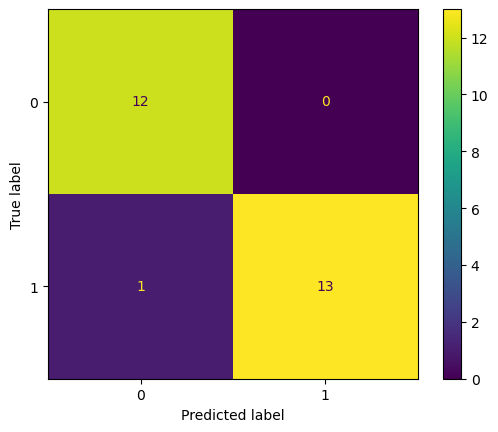

In [15]:
plot_confusion_matrix(dict_models['DecisionTreeClassifier'], X_test, Y_test)  
plt.show()

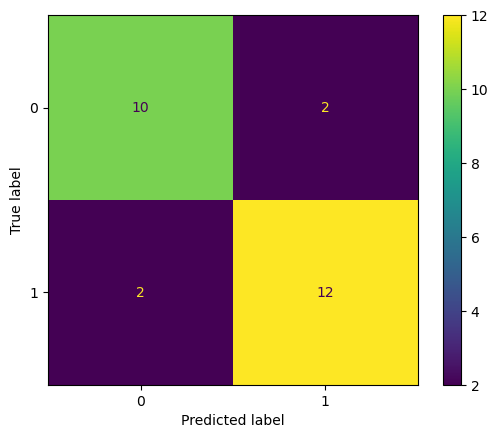

In [16]:
plot_confusion_matrix(dict_models['RandomForestClassifier'], X_test, Y_test)  
plt.show()

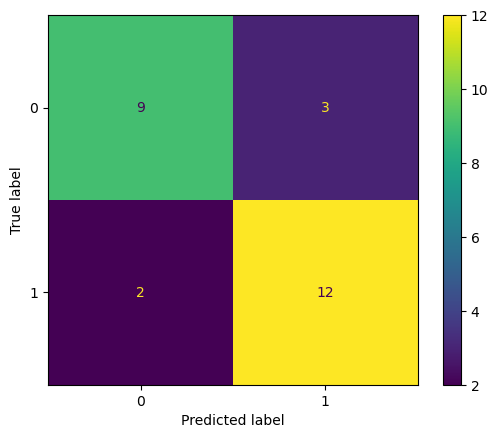

In [17]:
plot_confusion_matrix(dict_models['KNeighborsClassifier'], X_test, Y_test)  
plt.show()

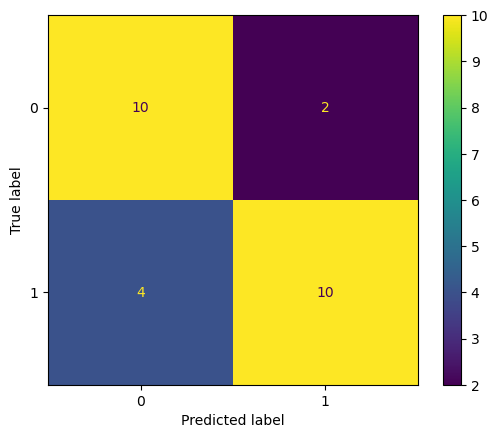

In [18]:
plot_confusion_matrix(dict_models['SVC'], X_test, Y_test)  
plt.show()

### Observation:

* from above, it shows that the Decision tree and Random forest performed better. However, the Decision tree did better on precision and recall, as the positive class is crutial. 
* it showa that just 1 label out of 14 from the class 1 was a wrong prediction. Also none of the 12 labels from the class 0 was  wrongly predicted.

Let's review again, Accuracy and Precision scores of both DecisionTree and RandomForest models, which have the best results from the previous section.

In [19]:
Y_pred_dt = dict_models['DecisionTreeClassifier'].predict(X_test)
print('precision of DecisionTreeClassifier is:', precision_score(Y_test,Y_pred_dt))
print('accuracy of DecisionTreeClassifier is:', accuracy_score(Y_test,Y_pred_dt))

precision of DecisionTreeClassifier is: 1.0
accuracy of DecisionTreeClassifier is: 0.9615384615384616


In [20]:
Y_pred_rf = dict_models['RandomForestClassifier'].predict(X_test)
print('precision of RandomForestClassifier is:', precision_score(Y_test,Y_pred_rf))
print('accuracy of RandomForestClassifierr is:', accuracy_score(Y_test,Y_pred_rf))

precision of RandomForestClassifier is: 0.8571428571428571
accuracy of RandomForestClassifierr is: 0.8461538461538461


## Final Decision

After reviewing the results above, the DecisionTree model is best fit for this project. Decision Tree Model stood out not only in accuracy but also in percision and recall, perfectly detecting 'unhappy customers'. Hence, it would be saved as the base model.

Before applying some feature selection, let's save the two models locally.

In [21]:
# save models to disk

file_DecisionTree_Model = 'DecisionTreeClassiifier_model_best.sav'
file_RandomForest_Model = 'RandomForestClassifier_model_best.sav'
joblib.dump(dict_models['DecisionTreeClassifier'], file_DecisionTree_Model)
joblib.dump(dict_models['RandomForestClassifier'], file_RandomForest_Model)

['RandomForestClassifier_model_best.sav']

In [22]:
#  here is the code to load the model from disk
'''
loaded_model = joblib.load('DecisionTreeClassifier_model_best.sav')
result = loaded_model.score(X_test, Y_test)
print(result)
'''

"\nloaded_model = joblib.load('DecisionTreeClassifier_model_best.sav')\nresult = loaded_model.score(X_test, Y_test)\nprint(result)\n"

### Feature Selection:
This is to find which questions/features are more important when predicting a customer’s happiness.
Firstly, the dependence of the features to the target will be examined and the using the SelectFromModel method.

#### Checking for denpendency between the features anf target

In [23]:
chi_scores = chi2(X, Y)
chi_scores

(array([1.44904066, 0.03616135, 0.90010372, 0.106194  , 2.27328624,
        0.54107039]),
 array([0.22868195, 0.84918268, 0.3427539 , 0.74451953, 0.13162055,
        0.46198946]))

<AxesSubplot:>

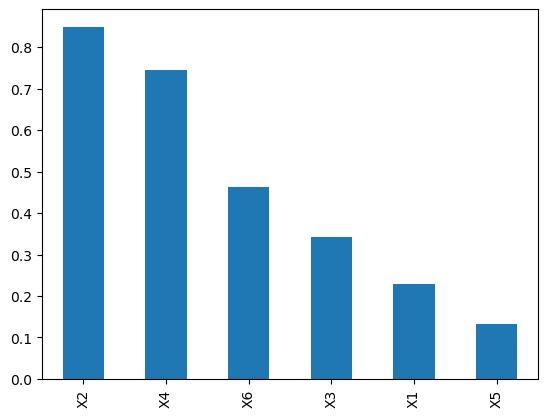

In [24]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

From the fig above X2, X4, and X6 have the highest p_values, hence, are the most independent variables in the data

In [25]:
np.random.seed(2)
selector=SelectFromModel(dict_models['DecisionTreeClassifier'])
selector.fit_transform(X_train,Y_train)
selector.get_support()
selected_feat=X.columns[(selector.get_support())]
selected_feat

Index(['X1', 'X3', 'X5'], dtype='object')

The output above shows that X1, X3 and X5 are the most relevant features in the model.
Now, let's drop X2, X4 and X6

In [26]:
# Defining the new features and target 

new_dataset = Dataset.drop(['X2','X4','X6'],axis=1)
X_new = new_dataset.drop('Y', axis=1) # this keeps only the relevant features X1, X5 and X3
Y_new = new_dataset['Y'] # select the target Y

In [27]:
#Defining another dictionary to store best models after feature selection

dict_models_2=dict()
dict_models_2.fromkeys(list_models)

{'DecisionTreeClassifier': None,
 'RandomForestClassifier': None,
 'KNeighborsClassifier': None,
 'SVC': None,
 'LogisticRegression': None}

In [28]:
# Applying same model selection method as used above

np.random.seed(0)
for model in list_models:
    L=[]
    for i in range(0,50):
        X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_new, Y_new, test_size=0.2, random_state=i)
        modele = load_model(model)
        modele.fit(X_train_n,Y_train_n)
        sc_train = modele.score(X_train_n,Y_train_n)
        sc_test = modele.score(X_test_n,Y_test_n)
        L.append(sc_test)
        if sc_test >= max(L):
            model_max = modele
    dict_models_2[model] = model_max
    print("best score of ",model,"is :",max(L),"with the random_state:",L.index(max(L)))
    Y_pred_n = dict_models_2[model].predict(X_test_n)
    print("\n report of the model: ", model,"\n", classification_report(Y_test_n, Y_pred_n),"\n")

best score of  DecisionTreeClassifier is : 0.8076923076923077 with the random_state: 8

 report of the model:  DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.79      0.79      0.79        14

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26
 

best score of  RandomForestClassifier is : 0.8076923076923077 with the random_state: 34

 report of the model:  RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.79      0.79      0.79        14

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26
 

best score of  KNeighborsClassifier is : 0.7692307692307693 with the 

After Feature selection both DecisionTree and RandomForest models have the same results and can be can considered equally. 